# 第6章 金融时间序列

## 6.1 pandas基础

### 6.1.1 使用DataFrame类的第一步

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'], index=['a', 'b', 'c', 'd'])
df
#    numbers
# a       10
# b       20
# c       30
# d       40

df.index
# Index(['a', 'b', 'c', 'd'], dtype='object')

df.columns
# Index(['numbers'], dtype='object')

df.loc['c']
# numbers    30
# Name: c, dtype: int64

df.loc[['a', 'b']]
#    numbers
# a       10
# b       20

df.loc[df.index[1:3]]
#    numbers
# b       20
# c       30

df.sum()
# numbers    100
# dtype: int64

df.apply(lambda x: x ** 2)
#    numbers
# a      100
# b      400
# c      900
# d     1600

df ** 2
#    numbers
# a      100
# b      400
# c      900
# d     1600

df['floats'] = (1.5, 2.5, 3.5, 4.5)
df
#    numbers  floats
# a       10     1.5
# b       20     2.5
# c       30     3.5
# d       40     4.5

df['floats']
# a    1.5
# b    2.5
# c    3.5
# d    4.5
# Name: floats, dtype: float64

df.floats
# a    1.5
# b    2.5
# c    3.5
# d    4.5
# Name: floats, dtype: float64

df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'], index=['d', 'a', 'b', 'c'])
df
#    numbers  floats     names
# a       10     1.5     Guido
# b       20     2.5     Felix
# c       30     3.5  Francesc
# d       40     4.5      Yves

df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)
#    numbers  floats     names
# 0       10    1.50     Guido
# 1       20    2.50     Felix
# 2       30    3.50  Francesc
# 3       40    4.50      Yves
# 4      100    5.75     Henry

df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index=['z', ]))
df
#    floats     names  numbers
# a    1.50     Guido       10
# b    2.50     Felix       20
# c    3.50  Francesc       30
# d    4.50      Yves       40
# z    5.75     Henry      100

df.join(pd.DataFrame([1, 4, 9, 16, 25], index=['a', 'b', 'c', 'd', 'y'], columns=['squares', ]))
#    floats     names  numbers  squares
# a    1.50     Guido       10      1.0
# b    2.50     Felix       20      4.0
# c    3.50  Francesc       30      9.0
# d    4.50      Yves       40     16.0
# z    5.75     Henry      100      NaN

df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                          index=['a', 'b', 'c', 'd', 'y'],
                          columns=['squares', ]),
             how='outer')
df
#    floats     names  numbers  squares
# a    1.50     Guido     10.0      1.0
# b    2.50     Felix     20.0      4.0
# c    3.50  Francesc     30.0      9.0
# d    4.50      Yves     40.0     16.0
# y     NaN       NaN      NaN     25.0
# z    5.75     Henry    100.0      NaN

df[['numbers', 'squares']].mean()
# numbers    40.0
# squares    11.0
# dtype: float64

df[['numbers', 'squares']].std()
# numbers    35.355339
# squares     9.669540
# dtype: float64

numbers    35.355339
squares     9.669540
dtype: float64

### 6.1.2 使用DataFrame类的第二步

In [2]:
a = np.random.standard_normal((9, 4))
a.round(6)
# array([[ 0.109076, -1.05275 ,  1.253471,  0.39846 ],
#        [-1.561175, -1.997425,  1.158739, -2.030734],
#        [ 0.764723,  0.760368,  0.864103, -0.174079],
#        [ 2.429043,  0.281962, -0.496606,  0.009445],
#        [-1.679758, -1.02374 , -1.135922,  0.077649],
#        [-0.247692,  0.301198,  2.156474,  1.537902],
#        [ 1.162934,  2.102327, -0.4501  ,  0.812529],
#        [-0.374749, -0.818229, -1.013962, -0.476855],
#        [ 0.626347,  2.294829, -1.29531 , -0.031501]])

df = pd.DataFrame(a)

#           0         1         2         3
# 0  0.109076 -1.052750  1.253471  0.398460
# 1 -1.561175 -1.997425  1.158739 -2.030734
# 2  0.764723  0.760368  0.864103 -0.174079
# 3  2.429043  0.281962 -0.496606  0.009445
# 4 -1.679758 -1.023740 -1.135922  0.077649
# 5 -0.247692  0.301198  2.156474  1.537902
# 6  1.162934  2.102327 -0.450100  0.812529
# 7 -0.374749 -0.818229 -1.013962 -0.476855
# 8  0.626347  2.294829 -1.295310 -0.031501

df.columns = [['No1', 'No2', 'No3', 'No4']]
print(df)
#         No1       No2       No3       No4
# 0  0.109076 -1.052750  1.253471  0.398460
# 1 -1.561175 -1.997425  1.158739 -2.030734
# 2  0.764723  0.760368  0.864103 -0.174079
# 3  2.429043  0.281962 -0.496606  0.009445
# 4 -1.679758 -1.023740 -1.135922  0.077649
# 5 -0.247692  0.301198  2.156474  1.537902
# 6  1.162934  2.102327 -0.450100  0.812529
# 7 -0.374749 -0.818229 -1.013962 -0.476855
# 8  0.626347  2.294829 -1.295310 -0.031501

print(df.loc[3, 'No2'])

dates = pd.date_range('2018-01-01', periods=9, freq='M')

print(dates)
# DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
#                '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
#                '2018-09-30'],
#               dtype='datetime64[ns]', freq='M')

        No1       No2       No3       No4
0  1.222260 -0.817853 -0.532649 -2.566344
1 -0.037351 -0.583468  0.469302  1.380410
2 -0.998961 -0.400680 -1.304499  1.066117
3 -0.292083  0.830559 -1.191645  0.961231
4 -0.602934  0.158248  1.065890  1.275709
5 -0.322808 -0.458587  0.363633  0.009649
6  1.709697 -0.132829 -0.896130 -0.052514
7 -0.285970  0.207426 -0.436078 -1.354851
8  1.394036 -1.081259 -0.496435 -0.391187
No2    0.830559
Name: 3, dtype: float64
DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='M')


* data_range函数参数

| 参数      | 格式            | 描述                         |
| --------- | --------------- | ---------------------------- |
| start     | 字符串/日期时间 | 生成日期的左界               |
| end       | 字符串/日期时间 | 生成日期的右界               |
| periods   | 整数/None       | 期数（如果start或者end空缺） |
| freq      | 字符串/日期偏移 | 频率字符串,例如5D (5天）     |
| tz        | 字符串/None     | 本地化索引的时区名称         |
| nonnalize | 布尔值,默认None | 将star和end规范化为午夜      |
| name      | 字符串,默认None | 结果索引名称                 |

* data_range函数频率参数值

| 别名 | 描述                   |
| ---- | ---------------------- |
| B    | 交易日                 |
| C    | 自定义交易日（试验性） |
| D    | 日历日                 |
| W    | 每周                   |
| M    | 每月底                 |
| BM   | 每月最后一个交易日     |
| MS   | 月初                   |
| BMS  | 每月第一个交易日       |
| Q    | 季度末                 |
| BQ   | 每季度最后一个交易日   |
| QS   | 季度初                 |
| BQS  | 每季度第一个交易日     |
| A    | 每年底                 |
| BA   | 每年最后一个交易日     |
| AS   | 每年初                 |
| BAS  | 每年第一个交易日       |
| H    | 每小时                 |
| T    | 每分钟                 |
| S    | 每秒                   |
| L    | 毫秒                   |
| U    | 微秒                   |

### 6.1.3 基本分析

In [3]:
df.sum()

No1    1.785887
No2   -2.278445
No3   -2.958611
No4    0.328220
dtype: float64

In [4]:
df.mean()

No1    0.198432
No2   -0.253161
No3   -0.328735
No4    0.036469
dtype: float64

In [5]:
df.cumsum()

,No1,No2,No3,No4
0,1.222260,-0.817853,-0.532649,-2.566344
1,1.184909,-1.401322,-0.063347,-1.185934
2,0.185948,-1.802002,-1.367847,-0.119817
3,-0.106135,-0.971443,-2.559491,0.841414
4,-0.709069,-0.813195,-1.493601,2.117123
5,-1.031876,-1.271783,-1.129968,2.126773
6,0.677821,-1.404612,-2.026098,2.074258
7,0.391851,-1.197186,-2.462176,0.719407
8,1.785887,-2.278445,-2.958611,0.328220


In [6]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.198432,-0.253161,-0.328735,0.036469
std,0.977247,0.586090,0.803205,1.330375
min,-0.998961,-1.081259,-1.304499,-2.566344
25%,-0.322808,-0.583468,-0.896130,-0.391187
50%,-0.285970,-0.400680,-0.496435,0.009649
75%,1.222260,0.158248,0.363633,1.066117
max,1.709697,0.830559,1.065890,1.380410


In [7]:
np.sqrt(df)

/Library/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,No1,No2,No3,No4
0,1.105559,NaN,NaN,NaN
1,NaN,NaN,0.685056,1.174909
2,NaN,NaN,NaN,1.032529
3,NaN,0.911350,NaN,0.980424
4,NaN,0.397803,1.032419,1.129473
5,NaN,NaN,0.603020,0.098232
6,1.307554,NaN,NaN,NaN
7,NaN,0.455440,NaN,NaN
8,1.180693,NaN,NaN,NaN


In [8]:
np.sqrt(df).sum()

/Library/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


No1    3.593806
No2    1.764593
No3    2.320495
No4    4.415566
dtype: float64

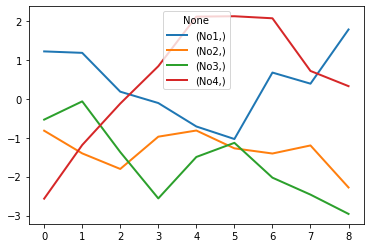

In [9]:
df.cumsum().plot(lw=2.0)

### Series类

        No1       No2       No3       No4
0  1.222260 -0.817853 -0.532649 -2.566344
1 -0.037351 -0.583468  0.469302  1.380410
2 -0.998961 -0.400680 -1.304499  1.066117
3 -0.292083  0.830559 -1.191645  0.961231
4 -0.602934  0.158248  1.065890  1.275709
5 -0.322808 -0.458587  0.363633  0.009649
6  1.709697 -0.132829 -0.896130 -0.052514
7 -0.285970  0.207426 -0.436078 -1.354851
8  1.394036 -1.081259 -0.496435 -0.391187
<class 'pandas.core.frame.DataFrame'>
        No1
0  1.222260
1 -0.037351
2 -0.998961
3 -0.292083
4 -0.602934
5 -0.322808
6  1.709697
7 -0.285970
8  1.394036
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'value')

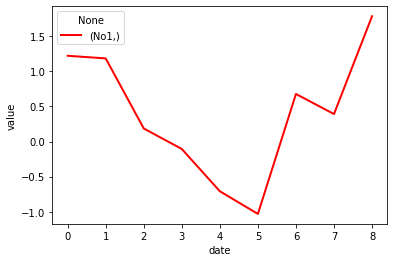

In [10]:
print(df)
print(type(df))
# pandas.core.frame.DataFrame

print(df[['No1']])
# 2018-01-31    0.109076
# 2018-02-28   -1.561175
# 2018-03-31    0.764723
# 2018-04-30    2.429043
# 2018-05-31   -1.679758
# 2018-06-30   -0.247692
# 2018-07-31    1.162934
# 2018-08-31   -0.374749
# 2018-09-30    0.626347
# Freq: M, Name: No1, dtype: float64

print(type(df[['No1']]))
# pandas.core.series.Series

# DataFrame的主要方法也可用于Series对象
# 6-2 Series对象的线图
import matplotlib.pyplot as plt

df[['No1']].cumsum().plot(style='r', lw=2)
plt.xlabel('date')
plt.ylabel('value')

### 6.1.5 GroupBy操作

In [11]:
import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df)

      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
2   Devils     2  2014     863
3   Devils     3  2015     673
4    Kings     3  2014     741
5    kings     4  2015     812
6    Kings     1  2016     756
7    Kings     1  2017     788
8   Riders     2  2016     694
9   Royals     4  2014     701
10  Royals     1  2015     804
11  Riders     2  2017     690


In [12]:
groups = df.groupby('Team')
print(groups)



print(groups.mean())
#               No1       No2       No3       No4
# Quarter
# Q1      -0.229125 -0.763269  1.092104 -0.602118
# Q2       0.167198 -0.146860  0.174649  0.541665
# Q3       0.471511  1.192976 -0.919790  0.101391

print(groups.max())
#               No1       No2       No3       No4
# Quarter
# Q1       0.764723  0.760368  1.253471  0.398460
# Q2       2.429043  0.301198  2.156474  1.537902
# Q3       1.162934  2.294829 -0.450100  0.812529

print(groups.size())
# Quarter
# Q1    3
# Q2    3
# Q3    3
# dtype: int64

df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even']
groups = df.groupby(['Team', 'Odd_Even'])
groups.size()
# Quarter  Odd_Even
# Q1       Even        1
#          Odd         2
# Q2       Even        2
#          Odd         1
# Q3       Even        1
#          Odd         2
# dtype: int64

print(groups.mean())
#                        No1       No2       No3       No4
# Quarter Odd_Even
# Q1      Even     -1.561175 -1.997425  1.158739 -2.030734
#         Odd       0.436899 -0.146191  1.058787  0.112190
# Q2      Even      1.090676  0.291580  0.829934  0.773673
#         Odd      -1.679758 -1.023740 -1.135922  0.077649
# Q3      Even     -0.374749 -0.818229 -1.013962 -0.476855
#         Odd       0.894640  2.198578 -0.872705  0.390514

            Rank         Year      Points
Team                                     
Devils  2.500000  2014.500000  768.000000
Kings   1.666667  2015.666667  761.666667
Riders  1.750000  2015.500000  762.250000
Royals  2.500000  2014.500000  752.500000
kings   4.000000  2015.000000  812.000000
        Rank  Year  Points
Team                      
Devils     3  2015     863
Kings      3  2017     788
Riders     2  2017     876
Royals     4  2015     804
kings      4  2015     812
Team
Devils    2
Kings     3
Riders    4
Royals    2
kings     1
dtype: int64
                 Rank    Year  Points
Team   Odd_Even                      
Devils Even       3.0  2015.0   673.0
       Odd        2.0  2014.0   863.0
Kings  Even       1.0  2017.0   788.0
       Odd        2.0  2015.0   748.5
Riders Even       2.0  2016.0   739.5
       Odd        1.5  2015.0   785.0
Royals Even       4.0  2014.0   701.0
       Odd        1.0  2015.0   804.0
kings  Even       4.0  2015.0   812.0


## 金融数据

### 从雅虎财经拉取的苹果股价

In [16]:
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2019, 1, 1) # or start = '1/1/2016' or '2016-1-1'
end = datetime.date.today()
prices = web.DataReader('AAPL', 'yahoo', start, end)
# 从雅虎财经拉取的苹果股价
prices.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.205803
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.249401
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.439476
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.909672
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.829746


#### 指数历史水平

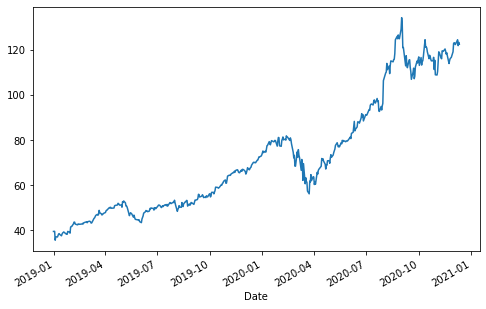

In [17]:
prices['Close'].plot(figsize=(8, 5))
prices['Close'].plot(figsize=(8, 5))

#### 指数 and 每日指数收益

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ed2103590>,
      dtype=object)

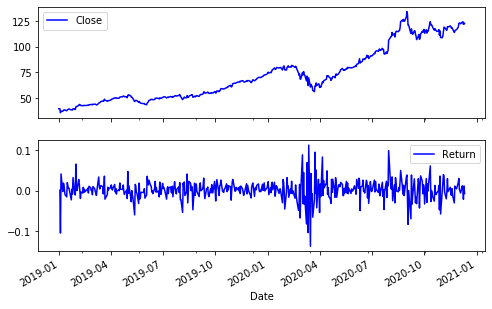

In [29]:
prices['Return'] = np.log(prices['Close']/prices['Close'].shift(1))
prices[['Close', 'Return']].plot(subplots=True, style='b', figsize=(8, 5))

#### 指数及移动平均线

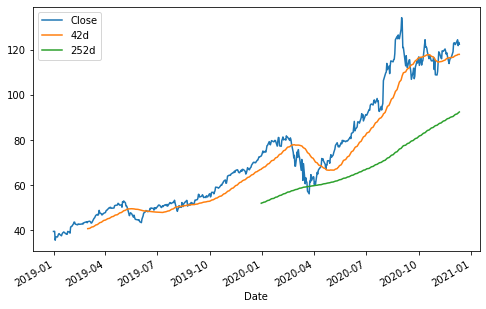

In [32]:
prices['42d'] = prices['Close'].rolling(42).mean()
prices['252d'] = prices['Close'].rolling(252).mean()
prices[['Close', '42d', '252d']].plot(figsize=(8, 5))

#### 指数和移动年化波动率

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ed27f10d0>,
      dtype=object)

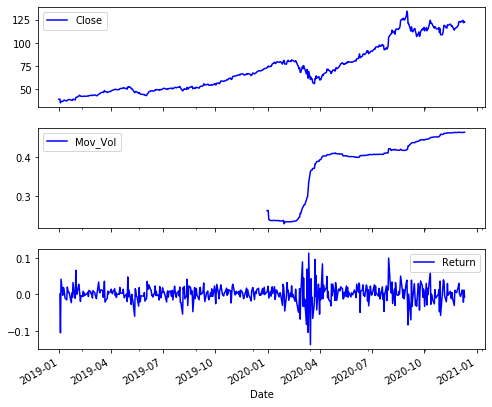

In [34]:
import math
prices['Mov_Vol'] = prices['Return'].rolling(252).std() * math.sqrt(252)
prices[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b', figsize=(8, 7))

## 6.3 回归分析

In [40]:
import pandas as pd
import urllib.request

es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'

es_txt = '/Users/liupeng/PycharmProjects/pythonProject/PythonForFinancial/es.txt'
vs_txt = '/Users/liupeng/PycharmProjects/pythonProject/PythonForFinancial/vs.txt'
urllib.request.urlretrieve(es_url, es_txt)
urllib.request.urlretrieve(vs_url, vs_txt)

# 数据处理
lines = open(es_txt, 'r').readlines()
lines = [line.replace(' ', '') for line in lines]
# 生成一个新的文本文件
es50_txt = '/Users/liupeng/PycharmProjects/pythonProject/PythonForFinancial/es50.txt'
new_file = open(es50_txt, 'w')
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1])  # DEL用来占位
new_file.writelines(lines[4:])
new_file.close()

new_lines = open(es50_txt, 'r').readlines()
new_lines[:5]
# ['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
#  '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
#  '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
#  '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
#  '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']
es = pd.read_csv(es50_txt, index_col=0, parse_dates=True, sep=';', dayfirst=True)
es.head()
#               SX5P    SX5E   SXXP   SXXE   SXXF   SXXA    DK5F   DKXF  DEL
# date
# 1986-12-31  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56  NaN
# 1987-01-01  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56  NaN
# 1987-01-02  770.89  891.78  82.57  97.80  97.43  69.37  647.62  65.81  NaN
# 1987-01-05  771.89  898.33  82.82  98.60  98.19  69.16  649.94  65.82  NaN
# 1987-01-06  775.92  902.32  83.28  99.19  98.83  69.50  652.49  66.06  NaN

# 辅助列已经完成了使命，可以删除
del es['DEL']

es.info()
# <class 'pandas.core.frame.DataFrame'>
# DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
# Data columns (total 8 columns):
# SX5P    7673 non-null float64
# SX5E    7673 non-null float64
# SXXP    7673 non-null float64
# SXXE    7673 non-null float64
# SXXF    7673 non-null float64
# SXXA    7673 non-null float64
# DK5F    7673 non-null float64
# DKXF    7673 non-null float64
# dtypes: float64(8)
# memory usage: 539.5 KB

# 使用 read_csv 函数的高级功能，使导人更加紧凑和高效:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True, sep=';', dayfirst=True, header=None, skiprows=4, names=cols)
es.tail()
#                SX5P     SX5E    SXXP    SXXE    SXXF    SXXA     DK5F    DKXF
# 2016-09-28  2846.55  2991.11  342.57  324.24  407.97  350.45  9072.09  581.27
# 2016-09-29  2848.93  2991.58  342.72  324.08  407.65  350.90  9112.09  582.60
# 2016-09-30  2843.17  3002.24  342.92  325.31  408.27  350.09  9115.81  583.26
# 2016-10-03  2845.43  2998.50  343.23  325.08  408.44  350.92  9131.24  584.32
# 2016-10-04  2871.06  3029.50  346.10  327.73  411.41  353.92  9212.05  588.71

vs = pd.read_csv(vs_txt, index_col=0, header=2, parse_dates=True, sep=',', dayfirst=True)
vs.info()
# <class 'pandas.core.frame.DataFrame'>
# DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
# Data columns (total 9 columns):
# V2TX    4357 non-null float64
# V6I1    3906 non-null float64
# V6I2    4357 non-null float64
# V6I3    4296 non-null float64
# V6I4    4357 non-null float64
# V6I5    4357 non-null float64
# V6I6    4340 non-null float64
# V6I7    4357 non-null float64
# V6I8    4343 non-null float64
# dtypes: float64(9)
# memory usage: 340.4 KB

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX5P    7673 non-null   float64
 1   SX5E    7673 non-null   float64
 2   SXXP    7673 non-null   float64
 3   SXXE    7673 non-null   float64
 4   SXXF    7673 non-null   float64
 5   SXXA    7673 non-null   float64
 6   DK5F    7673 non-null   float64
 7   DKXF    7673 non-null   float64
dtypes: float64(8)
memory usage: 539.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V2TX    4357 non-null   float64
 1   V6I1    3906 non-null   float64
 2   V6I2    4357 non-null   float64
 3   V6I3    4296 non-null   float64
 4   V6I4    4357 non-null   float64
 5   V6I5    4357 non-null   float64
 6   V6I6    4340 non-null   float64
 7   V6

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EUROSTOXX  4554 non-null   float64
 1   VSTOXX     4554 non-null   float64
dtypes: float64(2)
memory usage: 266.7 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ed39f44d0>,
      dtype=object)

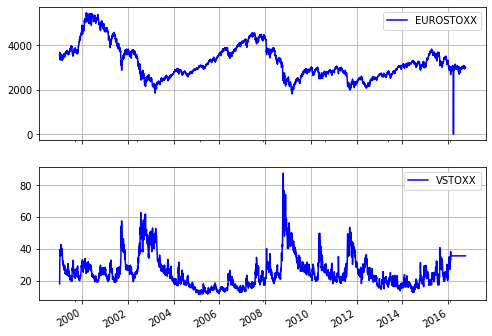

In [41]:
import datetime as dt

data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data = data.fillna(method='ffill')
data.info()
# <class 'pandas.core.frame.DataFrame'>
# DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
# Data columns (total 2 columns):
# EUROSTOXX    4554 non-null float64
# VSTOXX       4554 non-null float64
# dtypes: float64(2)
# memory usage: 266.7 KB
data.tail()
#             EUROSTOXX   VSTOXX
# 2016-09-28    2991.11  35.6846
# 2016-09-29    2991.58  35.6846
# 2016-09-30    3002.24  35.6846
# 2016-10-03    2998.50  35.6846
# 2016-10-04    3029.50  35.6846

# EURO STOXX 50指数和VSTOXX波动率指数
data.plot(subplots=True,grid=True,style='b',figsize=(8,6))

#### EURO STOXX 50和VSTOXX对数收益率

/Library/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ed3daf650>,
      dtype=object)

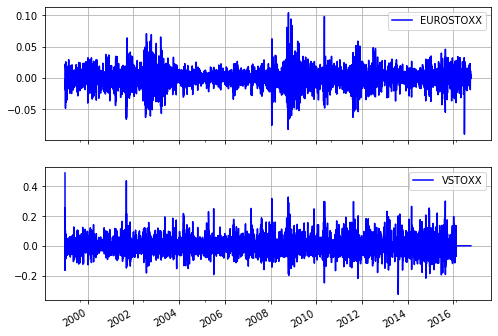

In [42]:
rets=np.log(data/data.shift(1))
rets.head()
#             EUROSTOXX    VSTOXX
# 1999-01-04        NaN       NaN
# 1999-01-05   0.017228  0.489248
# 1999-01-06   0.022138 -0.165317
# 1999-01-07  -0.015723  0.256337
# 1999-01-08  -0.003120  0.021570

# EURO STOXX 50和VSTOXX对数收益率
rets.plot(subplots=True,grid=True,style='b',figsize=(8,6))

#### 对数收益率散点图和回归线

EUROSTOXX   -2.753815
dtype: float64


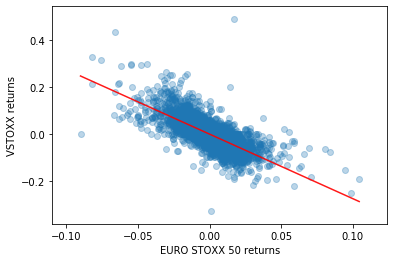

In [65]:
# 对数收益率散点图和回归线
y = rets.VSTOXX  # 结果变量
X = rets.EUROSTOXX  # 预测变量
p_inf=float("inf")  # 正无穷
n_inf=float("-inf")  # 负无穷
y = y.map(lambda x: y.median() if x == p_inf or x == n_inf or np.isnan(x) else x)
X = X.map(lambda x: y.median() if x == p_inf or x == n_inf or np.isnan(x) else x)

import matplotlib.pyplot as  plt
import statsmodels.api as sm

model = sm.OLS(y, X)
model = model.fit()
model.summary()

print(model.params)
# 选择100个从最小值到最大值平均分布（equally spaced）的数据点
X_prime = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
# 计算预测值
y_hat = model.predict(X_prime)
plt.scatter(X, y, alpha=0.3)  # 画出原始数据
plt.xlabel("EURO STOXX 50 returns")
plt.ylabel("VSTOXX returns")
plt.plot(X_prime, y_hat, 'r', alpha=0.9)  # 添加回归线，红色

#### EURO STOXX 50和VSTOXX之间的滚动相关

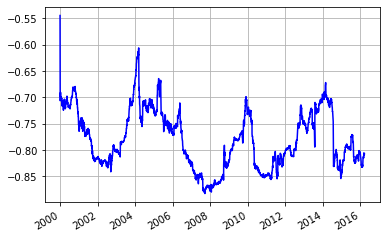

In [68]:
rets.corr()
#            EUROSTOXX    VSTOXX
# EUROSTOXX   1.000000 -0.724945
# VSTOXX     -0.724945  1.000000

rets.EUROSTOXX.rolling(252).corr(rets.VSTOXX).plot(grid=True,style='b')

In [69]:
## 6.4 高频数据

In [70]:
### 一个交易日的股价分时数据和交易量

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
               date   open  close   high    low  volume amount turnoverratio  \
0  2020-11-25 13:45  33.61  33.57  33.62  33.56  2624.0     {}        2.2190   
1  2020-11-25 13:50  33.57  33.44  33.57  33.44  3842.0     {}        3.2491   
2  2020-11-25 13:55  33.44  33.45  33.45  33.36  4445.0     {}        3.7590   
3  2020-11-25 14:00  33.45  33.42  33.55  33.41  2117.0     {}        1.7903   
4  2020-11-25 14:05  33.42  33.51  33.51  33.40  2482.0     {}        2.0990   

     code  
0  600118  
1  600118  
2  600118  
3  600118  
4  600118  
                 date  close  volume
0 2020-11-25 13:45:00  33.57  2624.0
1 2020-11-25 13:50:00  33.44  3842.0
2 2020-11-25 13:55:00  33.45  4445.0
3 2020-11-25 14:00:00  33.42  2117.0
4 2020-11-25 14:05:00  33.51  2482.0


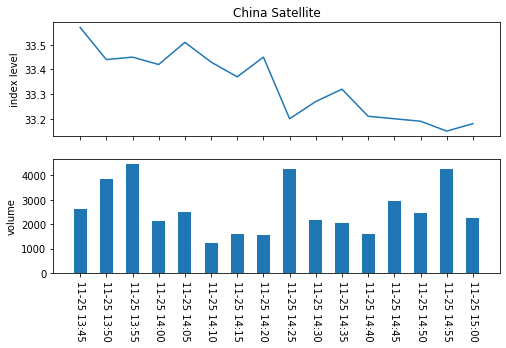

In [85]:
import numpy as np
import datetime as dt
import tushare as ts
import datetime
import matplotlib.pyplot as plt

# 这里用tushare获取了600118中国卫星一周的5分钟分时数据

k_5 = ts.get_k_data(code="600118", start="2018-06-18", end="2018-06-22", ktype='5')
print(k_5.head())
# 这个接口返回的数据和查询条件有些对不上，当测试数据还是可以的
#                date   open  close   high    low  volume    code
# 0  2018-06-12 14:55  20.57  20.57  20.58  20.54   489.0  600118
# 1  2018-06-12 15:00  20.56  20.56  20.57  20.54  1163.0  600118
# 2  2018-06-13 09:35  20.48  20.30  20.48  20.26  2895.0  600118
# 3  2018-06-13 09:40  20.30  20.34  20.39  20.30  1258.0  600118
# 4  2018-06-13 09:45  20.35  20.40  20.45  20.35   535.0  600118

k_5['date'] = k_5['date'].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))

# 筛选出一天的数据
plot_data = k_5[['date','close','volume']][(k_5['date'] > dt.datetime(2020, 11, 25)) & (k_5['date'] < dt.datetime(2020, 11, 26))]

print(plot_data.head())

# 横坐标
l = plot_data.index
lx = plot_data['date'].map(lambda x: datetime.datetime.strftime(x,'%m-%d %H:%M'))

# 画图
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 6))

# 折线图
ax1.plot(l, plot_data['close'].values)
ax1.set_title('China Satellite')
ax1.set_ylabel('index level')

# 柱状图
ax2.bar(l, plot_data['volume'].values.astype('int'), width=0.5)
ax2.set_ylabel('volume')
plt.xticks(l, lx, rotation=270)
fig.subplots_adjust(bottom=0.3)
plt.show()